# Random Forest - Predicción de Rendimiento Estudiantil

En este ejercicio, crearemos modelos de clasificación con el objetivo de predecir la calificación que obtendrán los estudiantes en función de sus características principales. Para ello, desarrollaremos modelos de árboles de decisión e implementaremos técnicas como la parada temprana (*early stopping*) y la poda de árboles (*tree pruning*) para mejorar la precisión de las predicciones. Además, implementaremos modelos de bosques aleatorios (*Random Forests*) para incrementar la capacidad de generalización del modelo y reducir la varianza.

Utilizaremos un conjunto de datos al que ya se le ha realizado un análisis exploratorio en otro Jupyter Notebook, el cual puedes consultar en el siguiente enlace:

[Rendimiento Estudiantil - Análisis Exploratorio de Datos (EDA)](https://github.com/Andersoncrs/Analisis_Exploratorio_De_Datos-EDA-_Rendimiento_Estudiantil)

Para obtener el conjunto de datos resultante en formato CSV, puedes acceder al siguiente enlace:

[Conjunto de datos acerca del Rendimiento Estudiantil](https://drive.google.com/uc?export=download&id=15_qqkw3nTs9fnhirRjITpLSt9lDoWTYP)

# Librerías

Las librerías que vamos a utilizar son:

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns


#Configuración Gráficas
# ==============================================================================
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","purple","#fcbf49"]
sns.set_theme( palette= palette, context= "notebook")


# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, ParameterGrid
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold, KFold
from tqdm import tqdm


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


# 1. Ingesta de Datos
Comenzaremos ingresando los datos sobre el rendimiento de los estudiantes utilizando la librería Pandas.

In [2]:
# Ingresamos el dataset limpio para trabajar
# ==============================================================================

df = pd.read_csv('Student_performance_data_clean.csv')
df

,edad,genero,etnia,educacion_padres,tiempo_estudio_semanal,ausencias,tutorias,apoyo_padres,extra_curricular_otro,extracurricular_deportes,extracurricular_musica,extracurricular_voluntariado,promedio,calificacion
0,17,femenino,caucasico,formacion_universitaria,19.833723,7,si,moderado,no,no,si,no,2.929196,C
1,18,masculino,caucasico,escuela_secundaria,15.408756,0,no,bajo,no,no,no,no,3.042915,B
2,15,masculino,asiatico,licenciatura,4.210570,26,no,moderado,no,no,no,no,0.112602,F
3,17,femenino,caucasico,licenciatura,10.028829,14,no,alto,si,no,no,no,2.054218,D
4,17,femenino,caucasico,formacion_universitaria,4.672495,17,si,alto,no,no,no,no,1.288061,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,femenino,caucasico,licenciatura,10.680555,2,no,muy_alto,si,no,no,no,3.455509,B
2388,17,masculino,caucasico,escuela_secundaria,7.583217,4,si,muy_alto,no,si,no,no,3.279150,B
2389,16,femenino,caucasico,formacion_universitaria,6.805500,20,no,moderado,no,no,no,si,1.142333,F
2390,16,femenino,afroamericano,ninguno,12.416653,17,no,moderado,no,si,si,no,1.803297,F


En el análisis exploratorio de datos realizado en el informe anterior, se llevaron a cabo tareas de limpieza, detección de datos faltantes y valores atípicos. Por lo tanto, este conjunto de datos ya está limpio y listo para ser utilizado en modelos como los árboles de decisión y los bosques aleatorios.

Un paso importante es comprender las variables que tenemos en nuestro conjunto de datos, las cuales son:

- **edad**: Indica la edad del estudiante.

- **género**: Indica el género de cada estudiante, ya sea masculino o femenino.

- **etnia**: Se refiere al origen étnico de cada estudiante. Los valores posibles son:
  - caucásico
  - afroamericano
  - asiático
  - otro

- **educacion_padres**: Se refiere al nivel de educación de los padres de cada estudiante. Los valores que puede tomar son:
  - ninguno
  - escuela_secundaria
  - formacion_universitaria
  - licenciatura
  - mas_alto

- **tiempo_estudio_semanal**: Indica el tiempo semanal en horas que cada estudiante dedica a su formación.

- **ausencias**: Se refiere al número de ausencias que ha tenido el estudiante durante el curso.

- **tutorías**: Indica si el estudiante recibe tutorías o no.

- **apoyo_padres**: Se refiere al nivel de apoyo que recibe cada estudiante de parte de los padres. Los valores posibles son:
  - ninguno
  - bajo
  - moderado
  - alto
  - muy_alto

- **extracurricular_otro**: Indica la participación en actividades extracurriculares diferentes a las mencionadas en el conjunto de datos.

- **extracurricular_deportes**: Se refiere a si el estudiante participa en deportes.

- **extracurricular_musica**: Indica si el estudiante participa en actividades musicales.

- **extracurricular_voluntariado**: Indica si el estudiante participa en voluntariado.

- **promedio**: Indica el promedio de las calificaciones de los estudiantes.

- **calificación**: Indica la calificación de los estudiantes en función del promedio. Los valores que puede tomar son:
  - F: Muy Deficiente
  - D: Insuficiente
  - C: Suficiente
  - B: Notable
  - A: Sobresaliente



In [3]:
# Obtenemos información del dataset
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   edad                          2392 non-null   int64  
 1   genero                        2392 non-null   object 
 2   etnia                         2392 non-null   object 
 3   educacion_padres              2392 non-null   object 
 4   tiempo_estudio_semanal        2392 non-null   float64
 5   ausencias                     2392 non-null   int64  
 6   tutorias                      2392 non-null   object 
 7   apoyo_padres                  2392 non-null   object 
 8   extra_curricular_otro         2392 non-null   object 
 9   extracurricular_deportes      2392 non-null   object 
 10  extracurricular_musica        2392 non-null   object 
 11  extracurricular_voluntariado  2392 non-null   object 
 12  promedio                      2392 non-null   float64
 13  cal

El objetivo de esta actividad es predecir la calificación del estudiante, utilizando modelos que nos permitan clasificar la variable de respuesta a través de sus variables predictoras. Es importante notar lo siguiente:

- La variable **promedio** está directamente relacionada con la variable objetivo que tenemos, ya que la letra correspondiente a la calificación está totalmente determinada por el promedio del estudiante. Por lo tanto, para esta práctica de clasificación, eliminaremos esta variable del conjunto de datos, ya que en las predicciones posteriores que realice el modelo, no tendrá acceso a esta característica.

In [4]:
# Eliminamos la columna promedio para trabajar con las variables independientes
# ==============================================================================

df = df.drop(columns= ['promedio'])
df

,edad,genero,etnia,educacion_padres,tiempo_estudio_semanal,ausencias,tutorias,apoyo_padres,extra_curricular_otro,extracurricular_deportes,extracurricular_musica,extracurricular_voluntariado,calificacion
0,17,femenino,caucasico,formacion_universitaria,19.833723,7,si,moderado,no,no,si,no,C
1,18,masculino,caucasico,escuela_secundaria,15.408756,0,no,bajo,no,no,no,no,B
2,15,masculino,asiatico,licenciatura,4.210570,26,no,moderado,no,no,no,no,F
3,17,femenino,caucasico,licenciatura,10.028829,14,no,alto,si,no,no,no,D
4,17,femenino,caucasico,formacion_universitaria,4.672495,17,si,alto,no,no,no,no,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,femenino,caucasico,licenciatura,10.680555,2,no,muy_alto,si,no,no,no,B
2388,17,masculino,caucasico,escuela_secundaria,7.583217,4,si,muy_alto,no,si,no,no,B
2389,16,femenino,caucasico,formacion_universitaria,6.805500,20,no,moderado,no,no,no,si,F
2390,16,femenino,afroamericano,ninguno,12.416653,17,no,moderado,no,si,si,no,F


Además, podemos observar que las variables cualitativas tienen el tipo de dato *Object*, cuando un tipo de dato más adecuado sería *category*. Por lo tanto, realizaremos la conversión al tipo de dato adecuado para las variables cualitativas

In [5]:
# Realizamos la conversion del tipo de dato object a category
# ==============================================================================

caracteristicas_cualitativas = df.select_dtypes(include = ['object']).columns
df[caracteristicas_cualitativas] = df[caracteristicas_cualitativas].astype('category')

Observamos que los cambios se han efectuado correctamente en el conjunto de datos

In [6]:
# Comprobamos los cambios realizados en el dataset 
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   edad                          2392 non-null   int64   
 1   genero                        2392 non-null   category
 2   etnia                         2392 non-null   category
 3   educacion_padres              2392 non-null   category
 4   tiempo_estudio_semanal        2392 non-null   float64 
 5   ausencias                     2392 non-null   int64   
 6   tutorias                      2392 non-null   category
 7   apoyo_padres                  2392 non-null   category
 8   extra_curricular_otro         2392 non-null   category
 9   extracurricular_deportes      2392 non-null   category
 10  extracurricular_musica        2392 non-null   category
 11  extracurricular_voluntariado  2392 non-null   category
 12  calificacion                  2392 non-null   ca


# 2. Preparación de Datos

Para la generación de modelos de clasificación como los árboles de decisión y bosques aleatorios, en teoría, estos pueden manejar tanto predictores numéricos como categóricos. Esto implica que no es necesario realizar el mapeo numérico de variables categóricas mediante técnicas como dummy o One-Hot-Encoding. Sin embargo, en la práctica, esto depende de la implementación del algoritmo en cada librería que se utilice para generar el modelo. En el caso de la librería scikit-learn, es necesario convertir las variables categóricas en variables numéricas.

Por lo tanto, procederemos a mapear las variables categóricas a variables numéricas mediante la técnica de One-Hot-Encoding. La única variable categórica a la que no se le aplicará el mapeo numérico es la variable dependiente, que es la que queremos predecir.

In [7]:
# capturamos las variables categóricas del dataset a excepción de la variable dependiente
# ==============================================================================
caracteristicas_categoricas = df.select_dtypes(include = ['category']).columns.drop('calificacion')

In [8]:
# Realizamos la codificación de las variables categóricas a través de OneHotEncoder
# ==============================================================================

onehot = OneHotEncoder(handle_unknown='ignore', drop='first')
codificacion = onehot.fit(df[caracteristicas_categoricas])

# Transformamos los datos y los convertimos en un DataFrame
# ==============================================================================

df_codificado = pd.DataFrame(codificacion.transform(df[caracteristicas_categoricas]).toarray(),
                             columns=onehot.get_feature_names_out(caracteristicas_categoricas))
df_codificado

,genero_masculino,etnia_asiatico,etnia_caucasico,etnia_otro,educacion_padres_formacion_universitaria,educacion_padres_licenciatura,educacion_padres_mas_alto,educacion_padres_ninguno,tutorias_si,apoyo_padres_bajo,apoyo_padres_moderado,apoyo_padres_muy_alto,apoyo_padres_ninguno,extra_curricular_otro_si,extracurricular_deportes_si,extracurricular_musica_si,extracurricular_voluntariado_si
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2388,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2389,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


Ahora uniremos el conjunto de datos que contiene el mapeo numérico de las variables categóricas. Además, eliminaremos las variables originales que siguen siendo de naturaleza cualitativa.

In [9]:
# Concatenamos el DataFrame codificado con el DataFrame original y eliminamos las variables categóricas originales
# ==============================================================================

df = pd.concat([df, df_codificado], axis=1)
df.drop(columns=caracteristicas_categoricas, inplace=True)
df

,edad,tiempo_estudio_semanal,ausencias,calificacion,genero_masculino,etnia_asiatico,etnia_caucasico,etnia_otro,educacion_padres_formacion_universitaria,educacion_padres_licenciatura,...,educacion_padres_ninguno,tutorias_si,apoyo_padres_bajo,apoyo_padres_moderado,apoyo_padres_muy_alto,apoyo_padres_ninguno,extra_curricular_otro_si,extracurricular_deportes_si,extracurricular_musica_si,extracurricular_voluntariado_si
0,17,19.833723,7,C,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,18,15.408756,0,B,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,4.210570,26,F,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,10.028829,14,D,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,17,4.672495,17,F,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,10.680555,2,B,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2388,17,7.583217,4,B,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2389,16,6.805500,20,F,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2390,16,12.416653,17,F,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [10]:
# Observamos la cantidad de variables independientes y la variable dependiente en el dataset 
# ==============================================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   edad                                      2392 non-null   int64   
 1   tiempo_estudio_semanal                    2392 non-null   float64 
 2   ausencias                                 2392 non-null   int64   
 3   calificacion                              2392 non-null   category
 4   genero_masculino                          2392 non-null   float64 
 5   etnia_asiatico                            2392 non-null   float64 
 6   etnia_caucasico                           2392 non-null   float64 
 7   etnia_otro                                2392 non-null   float64 
 8   educacion_padres_formacion_universitaria  2392 non-null   float64 
 9   educacion_padres_licenciatura             2392 non-null   float64 
 10  educacion_padres_mas_alt

Podemos observar que tenemos como resultado del mapeo numérico de las variables categóricas, tenemos como resultado 21 columnas en el conjunto de datos.

## 2.1 División del Conjunto de Datos

Ahora procederemos a dividir nuestro conjunto de datos en datos de entrenamiento, que se utilizarán para alimentar el modelo durante su proceso de entrenamiento, y datos de prueba, que servirán para evaluar la precisión y el rendimiento del modelo. Utilizaremos una proporción del $70$% para los datos de entrenamiento y el $30$% restante para los datos de prueba.

In [11]:
# Dividimos nuestro dataset en variables independientes y dependiente
# ==============================================================================

X = df.drop(columns= 'calificacion')
y= df['calificacion']

In [12]:
# Dividimos nuestro dataset en entrenamiento y prueba
# ==============================================================================

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=1234,
                                                    shuffle=True,
                                                    stratify=y
                                                    )

# 3. Construcción del Modelo de Clasificación de Árbol de Decisión

Vamos a crear un modelo de árbol de decisión. Inicialmente, no estableceremos ninguna restricción que determine una condición de parada del árbol. Sin embargo, es importante recordar que si no se establece algún criterio de parada en la construcción del modelo de clasificación de árbol de decisión, es muy probable que el modelo presente sobreajuste (*overfitting*), lo que significa que el modelo se ajusta demasiado al ruido presente en los datos y, por lo tanto, no tiene una capacidad de generalización adecuada.

In [13]:
# Creamos un modelo de árbol de decisión básico y lo entrenamos con los datos de entrenamiento 
# ==============================================================================

arbol_basico = DecisionTreeClassifier(random_state=1234)
arbol_basico.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)


Ahora vamos a determinar la profundidad del árbol de decisión generado y la cantidad de nodos terminales.

In [14]:
# Hallamos la profundidad del árbol y el número de nodos terminales
# ==============================================================================

print(f"Profundidad del árbol: {arbol_basico.get_depth()}")
print(f"Número de nodos terminales: {arbol_basico.get_n_leaves()}")

Profundidad del árbol: 16
Número de nodos terminales: 351


Como podemos observar, el árbol tiene una profundidad de 16 niveles y 351 nodos terminales. Al ser tan extenso, es muy probable que se haya sobreajustado a los datos de entrenamiento, lo que puede resultar en una capacidad de generalización inadecuada. Además, aunque podría tener una capacidad de generalización suficientemente alta, el uso de tantos niveles de profundidad y nodos terminales puede ser excesivo. Por lo tanto, es posible reducir la cantidad de nodos que utiliza el modelo y, al mismo tiempo, mejorar su capacidad predictiva.

Gráficamente, el modelo se puede representar de la siguiente manera:

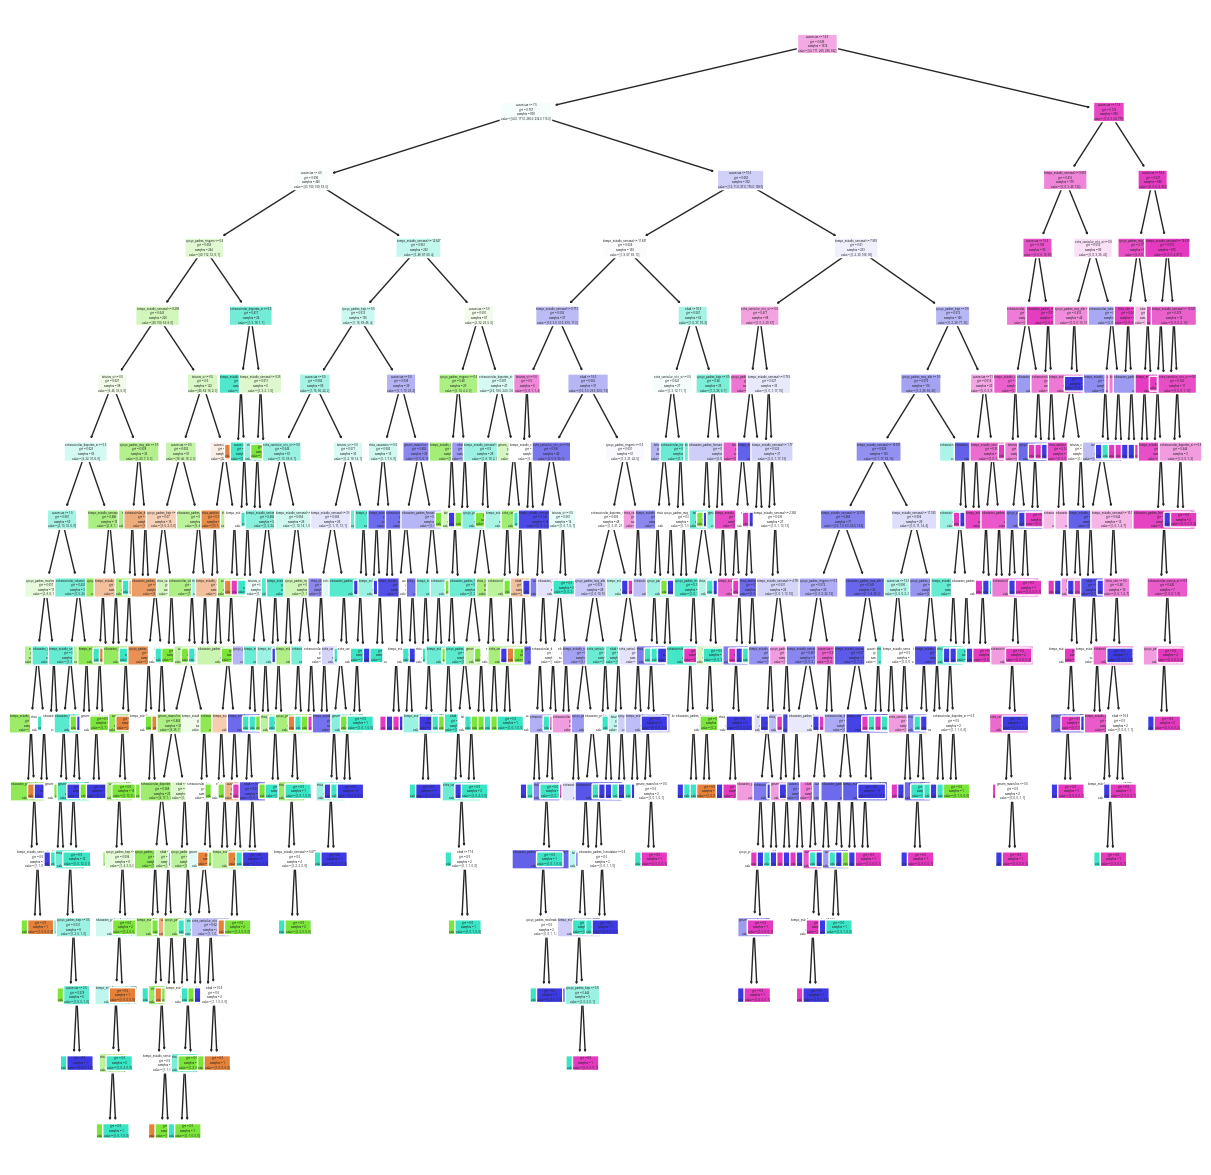

In [15]:
# Generamos la representación gráfica del árbol de decisión básico 
# ==============================================================================

fig, ax = plt.subplots(figsize=(15, 15))

plot_tree(arbol_basico, 
          filled=True, 
          rounded=True,
          feature_names=X_train.columns,
          ax=ax,
          fontsize= 2
         );

Vamos a evaluar la capacidad de generalización del árbol de decisión básico utilizando el conjunto de datos de prueba.

In [16]:
# Evaluamos la precisión del modelo en el conjunto de test 
# ==============================================================================

precision_arbol_basico = accuracy_score(y_true= y_test, 
                                        y_pred= arbol_basico.predict(X_test)
                                        )

print(f"La precisión del árbol básico en el conjunto de test es: {(precision_arbol_basico * 100):.3f}%")

La precisión del árbol básico en el conjunto de test es: 72.145%


Observamos que el modelo tiene una precisión del 72.145%, lo que significa que es capaz de predecir la calificación de los estudiantes basándose en el conjunto de características en un 72.145% de los casos. Realizaremos la técnica de validación cruzada para comprobar que la precisión del modelo sea consistente.

In [17]:
# Realizamos la validación cruzada del modelo de árbol básico 
# ==============================================================================

precision_arbol_basico_cv = cross_validate(estimator= arbol_basico, 
               X= X, 
               y= y, 
               cv= RepeatedKFold(n_splits= 5, 
                                 n_repeats=3, 
                                 random_state= 1234
                                 ), 
               n_jobs= -1, 
               scoring= 'accuracy'
               )

print(f"La precisión del árbol básico en el conjunto de test es: {(precision_arbol_basico_cv['test_score'].mean() * 100):.3f}%")
print(f'La desviación estándar de la precisión del árbol básico en el conjunto de test es: {(precision_arbol_basico_cv["test_score"].std()):.3f}')

La precisión del árbol básico en el conjunto de test es: 69.956%
La desviación estándar de la precisión del árbol básico en el conjunto de test es: 0.019


Crearemos un DataFrame donde colocaremos los resultados de cada modelo con el fin de poder comparar fácilmente las características de cada modelo y su capacidad de generalización. Utilizaremos la precisión como métrica de bondad de ajuste para los modelos generados.

In [18]:
# Creamos el DataFrame con las características y resultados de cada modelo
# =======================================================================

resultados_modelos = pd.DataFrame(columns=['modelo', 
                                           'profundidad',
                                           'nodos_terminales',
                                           'precision_test',
                                           'precision_media_cv',
                                           'precision_std_cv']
                                  )

In [19]:
# Añadimos los resultados del modelo básico al DataFrame de resultados 
# ==============================================================================

resultados_modelos.loc[resultados_modelos.shape[0]] = ['arbol_basico',
                               arbol_basico.get_depth(),
                               arbol_basico.get_n_leaves(),
                               round(precision_arbol_basico,3),
                               round(precision_arbol_basico_cv['test_score'].mean(),3),
                               round(precision_arbol_basico_cv['test_score'].std(),3)
                              ]

resultados_modelos

,modelo,profundidad,nodos_terminales,precision_test,precision_media_cv,precision_std_cv
0,arbol_basico,16,351,0.721,0.7,0.019


### 3.1 Árbol de Decisión - Early Stopping

Para evitar el sobreajuste y mejorar la eficiencia de un modelo de árbol de decisión, podemos implementar condiciones de detención temprana (*Early Stopping*). Esto se logra a través de la configuración de hiperparámetros que controlan el crecimiento del árbol. Una condición común para detener la expansión de los nodos es limitar la profundidad del árbol. Vamos a probar con dos niveles arbitrarios: 5 y 10.

Es importante tener en cuenta que la estrategia de *Early Stopping* tiene la limitación de que el árbol selecciona la mejor división posible en cada momento, sin considerar las divisiones futuras. Esta característica se conoce como un enfoque "codicioso" o *greedy*, ya que el algoritmo toma decisiones localmente óptimas en cada paso sin considerar el impacto en el largo plazo.

Comenzaremos con el modelo con 5 niveles:

In [20]:
# Creamos el modelo con la técnica de early stopping y 5 niveles de profundidad
# ==============================================================================

modelo_early_stopping_1 = DecisionTreeClassifier(max_depth=5, random_state=1234)
modelo_early_stopping_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1234)

Vamos a determinar la cantidad de nodos terminales que tiene el árbol de decisión con 5 niveles de profundidad.

In [21]:
# Hallamos la profundidad del árbol y el número de nodos terminales
# ==============================================================================

print(f"Profundidad del árbol: {modelo_early_stopping_1.get_depth()}")
print(f"Número de nodos terminales: {modelo_early_stopping_1.get_n_leaves()}")

Profundidad del árbol: 5
Número de nodos terminales: 32


Ahora vamos a representar gráficamente el árbol de decisión.

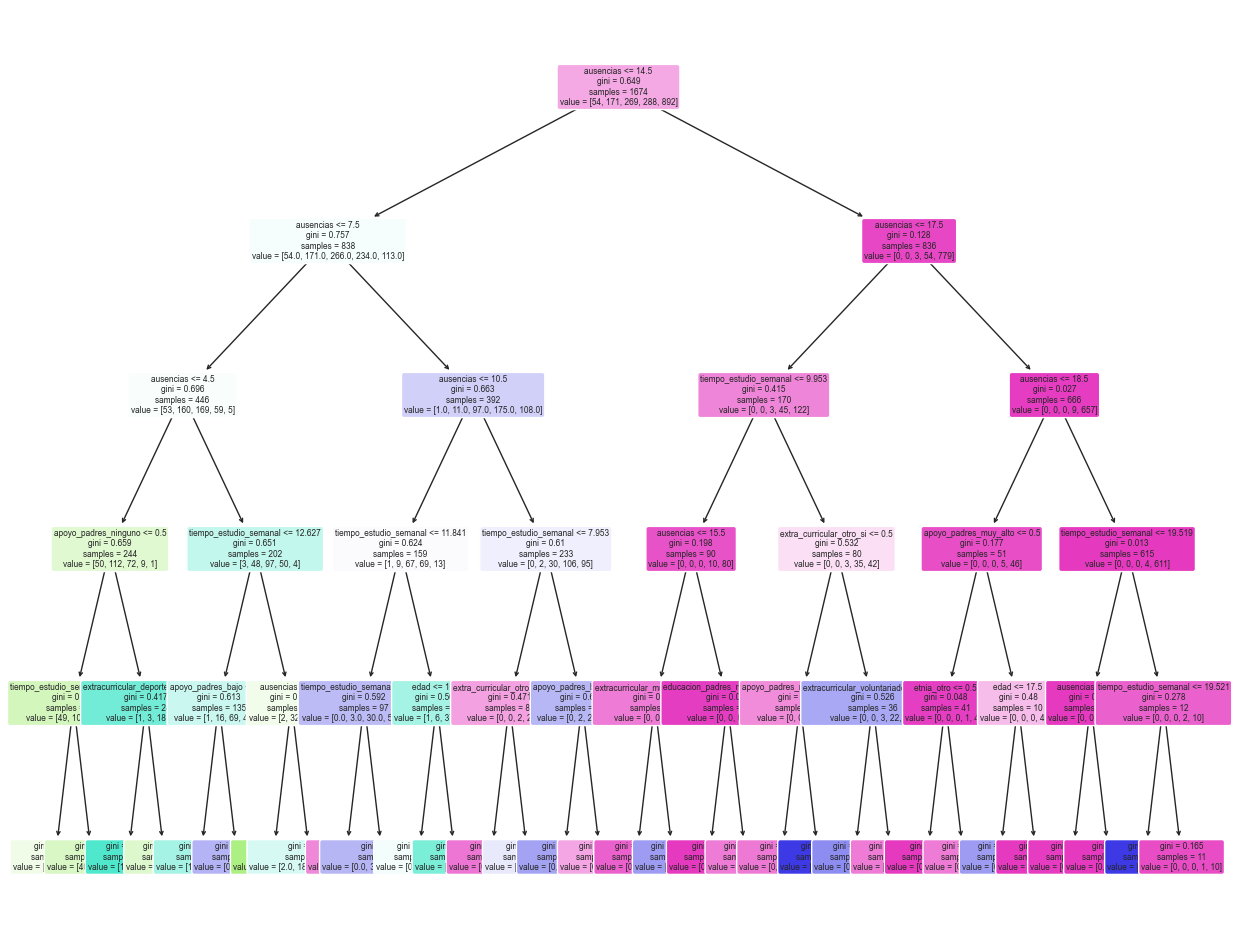

In [22]:
# Creamos la representación gráfica del árbol de decisión con early stopping y 5 niveles de profundidad
# ==============================================================================

fig, ax = plt.subplots(figsize=(15, 12))

plot_tree(modelo_early_stopping_1, 
          filled=True, 
          rounded=True,
          feature_names=X_train.columns,
          ax=ax,
          fontsize=6
         );

Además de representarla gráficamente, también podemos representarla en formato de texto. Esto nos permite ver las reglas de decisión en un formato legible.

In [23]:
# Representamos en texto las reglas de decisión del árbol de decisión con early stopping y 5 niveles de profundidad
# ==============================================================================

print(export_text(modelo_early_stopping_1, 
                  feature_names=list(X_train.columns),
                  spacing=5
                  )
      )

|----- ausencias <= 14.50
|     |----- ausencias <= 7.50
|     |     |----- ausencias <= 4.50
|     |     |     |----- apoyo_padres_ninguno <= 0.50
|     |     |     |     |----- tiempo_estudio_semanal <= 8.30
|     |     |     |     |     |----- class: B
|     |     |     |     |----- tiempo_estudio_semanal >  8.30
|     |     |     |     |     |----- class: B
|     |     |     |----- apoyo_padres_ninguno >  0.50
|     |     |     |     |----- extracurricular_deportes_si <= 0.50
|     |     |     |     |     |----- class: C
|     |     |     |     |----- extracurricular_deportes_si >  0.50
|     |     |     |     |     |----- class: B
|     |     |----- ausencias >  4.50
|     |     |     |----- tiempo_estudio_semanal <= 12.63
|     |     |     |     |----- apoyo_padres_bajo <= 0.50
|     |     |     |     |     |----- class: C
|     |     |     |     |----- apoyo_padres_bajo >  0.50
|     |     |     |     |     |----- class: D
|     |     |     |----- tiempo_estudio_semanal >  12.63

Hallamos la precisión del modelo por medio del conjunto de test.

In [24]:
# Evaluamos la precisión del modelo en el conjunto de test 
# ==============================================================================

precision_modelo_early_stopping_1= accuracy_score(y_true= y_test, 
                                        y_pred= modelo_early_stopping_1.predict(X_test)
                                        )

print(f"La precisión del árbol en el conjunto de test es: {(precision_modelo_early_stopping_1* 100):.3f}%")

La precisión del árbol en el conjunto de test es: 72.841%



Ahora realizaremos la técnica de validación cruzada para comprobar si los resultados de precisión son consistentes.

In [25]:
# Realizamos la validación cruzada del modelo de early stopping y 5 niveles de profundidad
# ==============================================================================

precision_modelo_early_stopping_1_cv= cross_validate(estimator= modelo_early_stopping_1, 
               X= X, 
               y= y, 
               cv= RepeatedKFold(n_splits= 5, 
                                 n_repeats=3, 
                                 random_state= 1234
                                 ), 
               n_jobs= -1, 
               scoring= 'accuracy'
               )

print(f"La precisión del árbol en el conjunto de test es: {(precision_modelo_early_stopping_1_cv['test_score'].mean() * 100):.3f}%")
print(f'La desviación estándar de la precisión del árbol en el conjunto de test es: {(precision_modelo_early_stopping_1_cv["test_score"].std()):.3f}')

La precisión del árbol en el conjunto de test es: 71.949%
La desviación estándar de la precisión del árbol en el conjunto de test es: 0.015


Añadimos los resultados del modelo al DataFrame

In [26]:
# Añadimos los resultados del modelo con early stopping al DataFrame de resultados
# ==============================================================================

resultados_modelos.loc[resultados_modelos.shape[0]] = ['modelo_early_stopping_1',
                                 modelo_early_stopping_1.get_depth(),
                                 modelo_early_stopping_1.get_n_leaves(),
                                 round(precision_modelo_early_stopping_1,3),
                                 round(precision_modelo_early_stopping_1_cv['test_score'].mean(),3),
                                 round(precision_modelo_early_stopping_1_cv['test_score'].std(),3)
                                ]

resultados_modelos

,modelo,profundidad,nodos_terminales,precision_test,precision_media_cv,precision_std_cv
0,arbol_basico,16,351,0.721,0.700,0.019
1,modelo_early_stopping_1,5,32,0.728,0.719,0.015


Ahora vamos a crear el siguiente modelo mediante la técnica de Early Stopping, estableciendo como hiperparámetro de parada un límite de profundidad del árbol de 10 niveles.

In [27]:
# Creamos el modelo con la técnica de early stopping y 10 niveles de profundidad
# ==============================================================================

modelo_early_stopping_2 = DecisionTreeClassifier(max_depth=10, random_state=1234)
modelo_early_stopping_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1234)

Determinamos la cantidad de nodos terminales.

In [28]:
# Hallamos la profundidad del árbol y el número de nodos terminales
# ==============================================================================

print(f"Profundidad del árbol: {modelo_early_stopping_2.get_depth()}")
print(f"Número de nodos terminales: {modelo_early_stopping_2.get_n_leaves()}")

Profundidad del árbol: 10
Número de nodos terminales: 242


Representamos gráficamente el árbol de decisión.

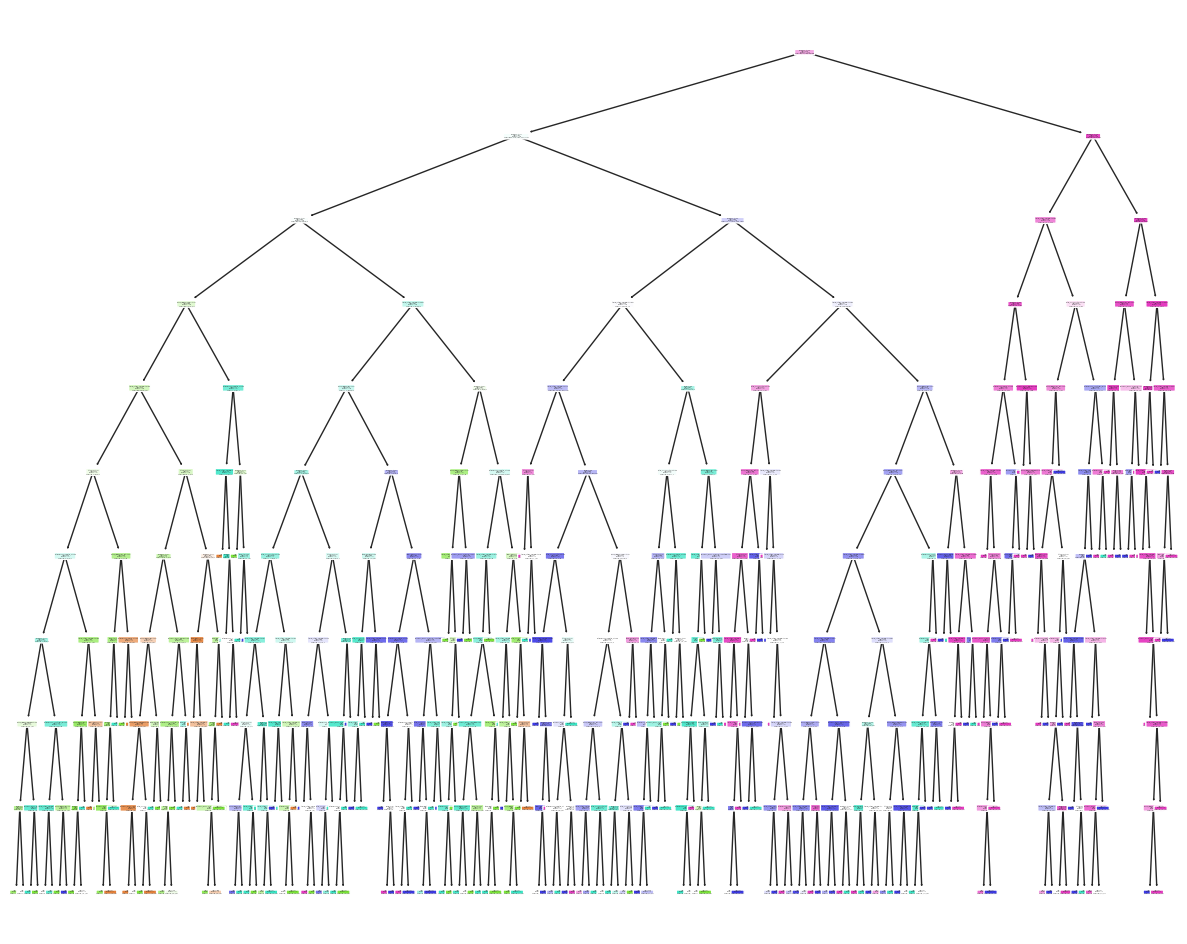

In [29]:
# Creamos la representación gráfica del árbol de decisión con early stopping y 10 niveles de profundidad
# ==============================================================================

fig, ax = plt.subplots(figsize=(15, 12))

plot_tree(modelo_early_stopping_2, 
          filled=True, 
          rounded=True,
          feature_names=X_train.columns,
          ax=ax,
         );

Hallamos la precisión del modelo

In [30]:
# Evaluamos la precisión del modelo en el conjunto de test 
# ==============================================================================

precision_modelo_early_stopping_2= accuracy_score(y_true= y_test, 
                                        y_pred= modelo_early_stopping_2.predict(X_test)
                                        )

print(f"La precisión del árbol en el conjunto de test es: {(precision_modelo_early_stopping_2 * 100):.3f}%")

La precisión del árbol en el conjunto de test es: 73.398%


Realizamos la técnica de validación cruzada

In [31]:
# Realizamos la validación cruzada del modelo de early stopping y 10 niveles de profundidad
# ==============================================================================

precision_modelo_early_stopping_2_cv= cross_validate(estimator= modelo_early_stopping_2, 
               X= X, 
               y= y, 
               cv= RepeatedKFold(n_splits= 5, 
                                 n_repeats=3, 
                                 random_state= 1234
                                 ), 
               n_jobs= -1, 
               scoring= 'accuracy'
               )

print(f"La precisión del árbol en el conjunto de test es: {(precision_modelo_early_stopping_2_cv['test_score'].mean() * 100):.3f}%")
print(f'La desviación estándar de la precisión del árbol en el conjunto de test es: {(precision_modelo_early_stopping_2_cv["test_score"].std()):.3f}')

La precisión del árbol en el conjunto de test es: 71.085%
La desviación estándar de la precisión del árbol en el conjunto de test es: 0.021


Añadimos los resultado al DataFrame

In [32]:
# Añadimos los resultados del modelo con early stopping al DataFrame de resultados 
# ==============================================================================

resultados_modelos.loc[resultados_modelos.shape[0]] = ['modelo_early_stopping_2',
                                    modelo_early_stopping_2.get_depth(),
                                    modelo_early_stopping_2.get_n_leaves(),
                                    round(precision_modelo_early_stopping_2,3),
                                    round(precision_modelo_early_stopping_2_cv['test_score'].mean(),3),
                                    round(precision_modelo_early_stopping_2_cv['test_score'].std(),3)
                                    ]

resultados_modelos

,modelo,profundidad,nodos_terminales,precision_test,precision_media_cv,precision_std_cv
0,arbol_basico,16,351,0.721,0.700,0.019
1,modelo_early_stopping_1,5,32,0.728,0.719,0.015
2,modelo_early_stopping_2,10,242,0.734,0.711,0.021


De los modelos que hemos generado hasta el momento, el que tiene una mayor precisión es el *modelo_early_stopping_1*, con una precisión en la validación cruzada del $71.9$%. Sin embargo, la diferencia en precisión con respecto a los demás modelos es muy baja. Por otro lado, hay una diferencia significativa en los hiperparámetros utilizados, ya que el modelo *modelo_early_stopping_1* utiliza solo $5$ niveles de profundidad y $32$ nodos terminales, lo cual genera un modelo mucho menos complejo y, a su vez, más eficiente.



## 3.2 Árbol de Decisión - Tree Pruning

A continuación, utilizaremos la técnica no codiciosa conocida como *Tree Pruning* para evitar el overfitting. Inicialmente, esta técnica crea árboles sin ninguna condición de parada. Luego, mediante la implementación de un valor de $\alpha$ que establece una penalización, podemos obtener árboles que tengan una mejor capacidad de generalización de los datos. 


Para encontrar el valor óptimo de $\alpha$, emplearemos la técnica de validación cruzada. Además, representaremos la evolución de la precisión en la validación cruzada con respecto a diferentes valores de $\alpha$. Cuanto mayor es este valor, más agresivo será el podado y menor será el tamaño del árbol resultante.

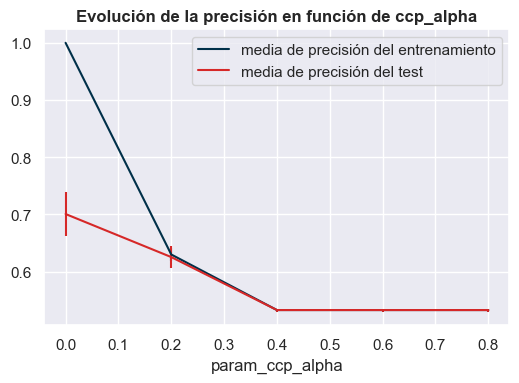

In [33]:
# Hallamos el valor optimo de ccp_alpha para el modelo de árbol de decisión


# Valores de ccp_alpha evaluados
# ==============================================================================

param_grid = {'ccp_alpha':np.arange(0, 1, 0.2)}

# Realizamos la búsqueda por validación cruzada
# ==============================================================================

grid = GridSearchCV(
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring= 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)

# Convertimos param_ccp_alpha a tipo flotante
scores['param_ccp_alpha'] = pd.to_numeric(scores['param_ccp_alpha'])

scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax, label= 'media de precisión del entrenamiento' )
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax, label= 'media de precisión del test')
ax.set_title("Evolución de la precisión en función de ccp_alpha", weight='bold');


Como podemos observar, los valores en los que el modelo tiene mayor precisión corresponden a valores bajos de $\alpha$, más específicamente, a valores muy cercanos a cero. En esta área, el modelo muestra una mayor precisión. Por lo tanto, vamos a hallar el valor óptimo de $\alpha$ que sea muy cercano a 0.

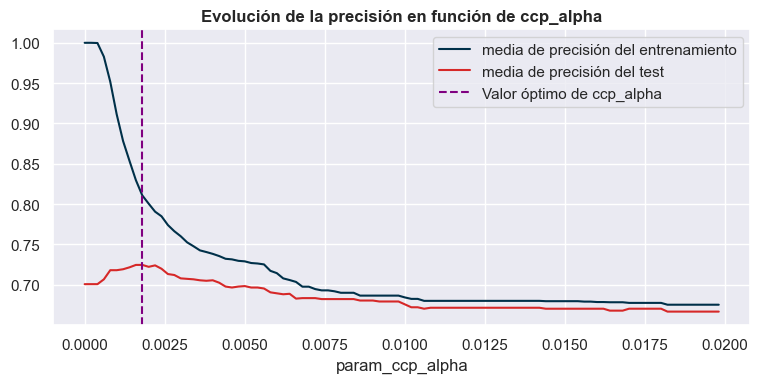

In [34]:
# Hallamos el valor optimo de ccp_alpha para el modelo de árbol de decisión


# Valores de ccp_alpha evaluados
# ==============================================================================

param_grid = {'ccp_alpha':np.arange(0, 0.02, 0.0002)}

# Realizamos la búsqueda por validación cruzada
# ==============================================================================

grid = GridSearchCV(
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state= 123
                            ),
        param_grid = param_grid,
        scoring= 'accuracy',
        cv         = 10,
        refit      = True,
        n_jobs= -1,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(9, 3.84))
scores = pd.DataFrame(grid.cv_results_)

# Convertimos param_ccp_alpha a tipo flotante
# ==============================================================================
scores['param_ccp_alpha'] = pd.to_numeric(scores['param_ccp_alpha'])

scores.plot(x='param_ccp_alpha', y='mean_train_score', ax=ax, label= 'media de precisión del entrenamiento')
scores.plot(x='param_ccp_alpha', y='mean_test_score', ax=ax, label= 'media de precisión del test')
ax.set_title("Evolución de la precisión en función de ccp_alpha", weight='bold');

# Representamos el valor óptimo de ccp_alpha
# ==============================================================================
ax.axvline(grid.best_params_['ccp_alpha'], color='purple', ls='--', label='Valor óptimo de ccp_alpha');
ax.legend();

Aquí podemos observar el punto de $\alpha$ que maximiza la precisión del modelo. En este punto se encuentra el valor óptimo que puede tomar $\alpha$ para maximizar la precisión del modelo de árbol de decisión. Vamos a determinar el valor de $\alpha$ en ese punto específico.

In [35]:
print(f"Valor óptimo de ccp_alpha es: {grid.best_params_['ccp_alpha']:.20f}")

Valor óptimo de ccp_alpha es: 0.00180000000000000017


Una vez que hemos calculado el valor óptimo de $\alpha$ que maximiza la precisión del modelo a través de la validación cruzada, podemos obtener el modelo con ese valor de $\alpha$ utilizando la propiedad `.best_estimator_`. De esta forma, no es necesario crear un nuevo modelo con ese valor de $\alpha$; basta con asignar esa propiedad a una variable que contendrá el modelo con el valor óptimo implementado.

In [36]:
# Asignamos el valor óptimo de ccp_alpha al modelo de árbol de decisión 
# ==============================================================================

modelo_tree_pruning = grid.best_estimator_

Ahora vamos a determinar la profundidad del árbol y la cantidad de nodos terminales del árbol de decisión al que se le ha aplicado la técnica de *Tree Pruning*.

In [37]:
# Hallamos la profundidad del árbol y el número de nodos terminales del modelo con ccp_alpha optimo 
# ==============================================================================

print(f"Profundidad del árbol: {modelo_tree_pruning.get_depth()}")
print(f"Número de nodos terminales: {modelo_tree_pruning.get_n_leaves()}")

Profundidad del árbol: 9
Número de nodos terminales: 36


Vamos a representar gráficamente el árbol.

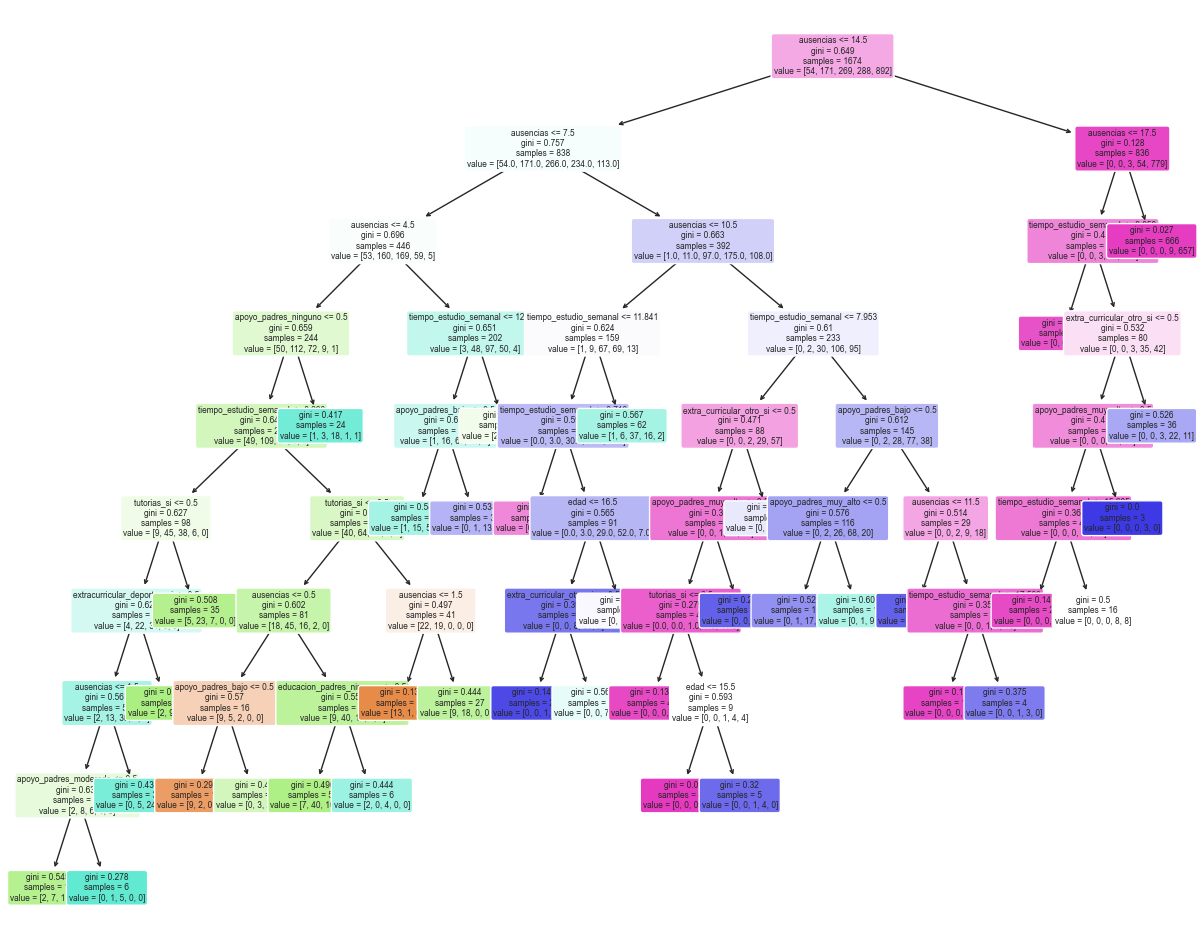

In [38]:
# Representamos el árbol de decisión con ccp_alpha optimo
# ==============================================================================

fig, ax = plt.subplots(figsize=(15, 12))

plot_tree(modelo_tree_pruning, 
          filled=True, 
          rounded=True,
          feature_names=X_train.columns,
          ax=ax,
          fontsize= 6
         );

Hallamos la precisión del modelo

In [39]:
# Evaluamos la precisión del modelo en el conjunto de test 
# ==============================================================================

precision_modelo_tree_pruning = accuracy_score(y_true= y_test, 
                                        y_pred= modelo_tree_pruning.predict(X_test)
                                        )

print(f"La precisión del árbol en el conjunto de test es: {(precision_modelo_tree_pruning * 100):.3f}%")

La precisión del árbol en el conjunto de test es: 75.905%


Ahora realizamos la técnica de validación cruzada para comprobar que los datos obtenidos en el conjunto de prueba del modelo, en referencia a la precisión, sean consistentes.

In [40]:
# Realizar la validación cruzada del modelo de árbol con ccp_alpha optimo 
# ==============================================================================

precision_modelo_tree_pruning_cv= cross_validate(estimator= modelo_tree_pruning, 
               X= X, 
               y= y, 
               cv= RepeatedKFold(n_splits= 5, 
                                 n_repeats=3, 
                                 random_state= 123
                                 ), 
               n_jobs= -1, 
               scoring= 'accuracy'
               )

print(f"La precisión del árbol en el conjunto de test es: {(precision_modelo_tree_pruning_cv['test_score'].mean() * 100):.3f}%")
print(f'La desviación estándar de la precisión del árbol en el conjunto de test es: {(precision_modelo_tree_pruning_cv["test_score"].std()):.3f}')

La precisión del árbol en el conjunto de test es: 73.383%
La desviación estándar de la precisión del árbol en el conjunto de test es: 0.018


La precisión obtenida por medio del árbol de decisión al que se le implementa el valor de penalización óptimo de $\alpha$ es del 73.383%, siendo la precisión más alta que hemos alcanzado en los modelos evaluados hasta el momento. Vamos a añadir los resultados obtenidos de este modelo en el DataFrame que contiene los resultados de todos los modelos generados.

In [41]:
# Añadimos los resultados del modelo con ccp_alpha optimo al DataFrame de resultados
# ==============================================================================

resultados_modelos.loc[resultados_modelos.shape[0]] = ['modelo_tree_pruning',
                                    modelo_tree_pruning.get_depth(),
                                    modelo_tree_pruning.get_n_leaves(),
                                    round(precision_modelo_tree_pruning,3),
                                    round(precision_modelo_tree_pruning_cv['test_score'].mean(),3),
                                    round(precision_modelo_tree_pruning_cv['test_score'].std(),3)
                                    ]

resultados_modelos



,modelo,profundidad,nodos_terminales,precision_test,precision_media_cv,precision_std_cv
0,arbol_basico,16,351,0.721,0.700,0.019
1,modelo_early_stopping_1,5,32,0.728,0.719,0.015
2,modelo_early_stopping_2,10,242,0.734,0.711,0.021
3,modelo_tree_pruning,9,36,0.759,0.734,0.018


# 4. Construcción del Modelo de Bosques Aleatorios

A continuación, vamos a crear un modelo de Bosques Aleatorios (*Random Forests*), los cuales están formados por múltiples árboles de decisión individuales. Cada uno de estos árboles está entrenado con una muestra de datos ligeramente diferente, generada mediante la técnica conocida como *Bootstrapping*. Para obtener nuevas predicciones, se combinan las predicciones de todos los árboles que conforman el modelo de Bosques Aleatorios. En la actualidad, este modelo es ampliamente utilizado debido a sus excelentes resultados en una amplia gama de problemas.

Para hallar los valores óptimos de los hiperparámetros en el modelo de Bosques Aleatorios, utilizaremos dos técnicas:

- **Grid Search basado en el valor del *Out-of-Bag Score*:** Consiste en evaluar cada árbol entrenado con las observaciones que fueron excluidas de dicho árbol, lo que nos permite obtener una estimación precisa de la precisión del modelo.

- **Grid Search basado en la validación cruzada:** Este método consiste en hallar los valores óptimos de los hiperparámetros utilizados en el modelo mediante la validación cruzada, la cual nos permite evaluar una métrica de bondad de ajuste; en este caso, utilizaremos la precisión del modelo.

## 4.1 Bosque Aleatorio - Grid Search basado en el valor del *Out-of-Bag Score*

A continuación, crearemos un modelo de clasificación de bosque aleatorio en el que determinaremos los valores óptimos de los hiperparámetros a través del valor del *Out-of-Bag Score*. Elegiremos los hiperparámetros del modelo que presente el mayor valor de esta métrica de evaluación.

In [42]:
# Grid de hiperparámetros evaluados para el modelo de Random Forest
# ==============================================================================
param_grid = ParameterGrid(
                {'max_features': np.arange(7, 15),
                 'max_depth'   : np.arange(7,17),
                 'criterion'   : ['gini', 'entropy'],
                 }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros generados
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in tqdm(param_grid):
    
    modelo = RandomForestClassifier(
                n_estimators= 150,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 19,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns='params')
resultados.head(10)

100%|██████████| 160/160 [01:47<00:00,  1.49it/s]


,oob_accuracy,criterion,max_depth,max_features
98,0.769415,entropy,9,9
48,0.767622,gini,13,7
125,0.767622,entropy,12,12
52,0.765830,gini,13,11
46,0.765830,gini,12,13
43,0.765830,gini,12,10
105,0.765233,entropy,10,8
90,0.764636,entropy,8,9
158,0.764636,entropy,16,13
136,0.764038,entropy,14,7


Una vez obtenidos los valores de los hiperparámetros que tienen el mayor *Out-of-Bag Score*, establecemos un modelo con esos valores.

In [43]:
# Capturamos los hiperparámetros que generan el mejor modelo 
# ==============================================================================

max_obbs = resultados.head(1).values.squeeze()
max_obbs

array([0.7694145758661888, 'entropy', 9, 9], dtype=object)

In [44]:
# Generamos el modelo de Random Forest con los hiperparámetros óptimos obtenidos y lo entrenamos con los datos de entrenamiento
# ==============================================================================

random_forest_obbs = RandomForestClassifier(n_estimators=150,
                                            random_state = 19,
                                            criterion=max_obbs[1],
                                            max_depth=max_obbs[2],
                                            max_features=max_obbs[3],  
                                            )
random_forest_obbs.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=9,
                       n_estimators=150, random_state=19)


Los modelos de Random Forest no se pueden representar gráficamente de manera sencilla debido a que consisten en múltiples árboles de decisión. Podemos determinar la profundidad máxima que puede tener cada árbol que pertenece al modelo Random Forest, así como la cantidad máxima de características con las que es entrenado cada árbol.

Procederemos a evaluar el modelo mediante los datos de prueba.

In [45]:
# Evaluamos la precisión del modelo
# ==============================================================================

precision_random_forest_obbs= accuracy_score(y_true= y_test, 
                                        y_pred= random_forest_obbs.predict(X_test)
                                        )

print(f"La precisión del árbol en el conjunto de test es: {(precision_random_forest_obbs * 100):.3f}%")

La precisión del árbol en el conjunto de test es: 77.994%


Realizamos la técnica de validación cruzada sobre el modelo.

In [46]:
# Realizamos la validación cruzada del modelo de Random Forest con los hiperparámetros óptimos obtenidos de la técnica out-of-bag score
# ==============================================================================

precision_random_forest_obbs_cv= cross_validate(estimator= random_forest_obbs, 
               X= X, 
               y= y, 
               cv= RepeatedKFold(n_splits= 5, 
                                 n_repeats=3, 
                                 random_state= 1234
                                 ), 
               n_jobs= -1, 
               scoring= 'accuracy'
               )

print(f"La precisión del árbol en el conjunto de test es: {(precision_random_forest_obbs_cv['test_score'].mean() * 100):.3f}%")
print(f'La desviación estándar de la precisión del árbol en el conjunto de test es: {(precision_random_forest_obbs_cv["test_score"].std()):.3f}')

La precisión del árbol en el conjunto de test es: 76.937%
La desviación estándar de la precisión del árbol en el conjunto de test es: 0.014


Añadimos los valores obtenidos del modelo Random Forest utilizando la técnica de *Out-of-Bag Score (OOB Score)* al DataFrame. En el caso de la cantidad de nodos terminales, este concepto no se aplica directamente a los modelos de Random Forest, debido a que cada árbol dentro del bosque puede tener una cantidad diferente de nodos terminales. Esto se debe a la naturaleza del Random Forest, donde cada árbol se construye de manera independiente y puede variar en profundidad y estructura. Entonces el valor que ponemos allí es `NaN`

In [47]:
# Añadimos los resultados del modelo de Random Forest al DataFrame de resultados
# ==============================================================================

resultados_modelos.loc[resultados_modelos.shape[0]] = ['random_forest_obbs',
                                    random_forest_obbs.get_params()['max_depth'],
                                    np.NaN,
                                    round(precision_random_forest_obbs,3),
                                    round(precision_random_forest_obbs_cv['test_score'].mean(),3),
                                    round(precision_random_forest_obbs_cv['test_score'].std(),3)
                                    ]

resultados_modelos

,modelo,profundidad,nodos_terminales,precision_test,precision_media_cv,precision_std_cv
0,arbol_basico,16,351.0,0.721,0.700,0.019
1,modelo_early_stopping_1,5,32.0,0.728,0.719,0.015
2,modelo_early_stopping_2,10,242.0,0.734,0.711,0.021
3,modelo_tree_pruning,9,36.0,0.759,0.734,0.018
4,random_forest_obbs,9,NaN,0.780,0.769,0.014


## 4.2 Bosque Aleatorio - Grid Search basado en la validación cruzada

A continuación, crearemos un modelo de clasificación de bosque aleatorio en el que determinaremos los valores óptimos de los hiperparámetros a través del método de validación cruzada. Este método nos permite seleccionar la métrica por la cual se elegirá el mejor modelo, en este caso, la métrica seleccionada será la precisión del modelo.

In [48]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {
    'max_features': np.arange(5,21),
    'max_depth'   : np.arange(10,17),
    'criterion'   : ['gini', 'entropy']
    }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(n_estimators= 150, random_state= 1234),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = KFold(n_splits= 5, shuffle= True, random_state=123), 
        refit      = True,
        verbose    = 1,
        return_train_score = True
       )

grid.fit(X=X_train, y=y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex='(param*|mean_t|std_t)') \
    .drop(columns='params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


,param_criterion,param_max_depth,param_max_features,mean_test_score,std_test_score,mean_train_score,std_train_score
149,entropy,12,10,0.773595,0.015392,0.999851,0.000299
116,entropy,10,9,0.772998,0.019347,0.994474,0.001302
115,entropy,10,8,0.772400,0.017159,0.993429,0.002689
118,entropy,10,11,0.771206,0.016961,0.994922,0.001729
117,entropy,10,10,0.770610,0.022908,0.994026,0.002165
206,entropy,15,19,0.770013,0.015885,1.000000,0.000000
222,entropy,16,19,0.770012,0.018012,1.000000,0.000000
158,entropy,12,19,0.769416,0.015003,0.999851,0.000299
198,entropy,15,11,0.769415,0.012717,1.000000,0.000000
166,entropy,13,11,0.769407,0.017945,1.000000,0.000000


Una vez realizada la búsqueda de hiperparámetros del modelo de bosque aleatorio mediante la validación cruzada y la métrica de precisión, podemos observar los hiperparámetros establecidos para el modelo que obtenga el valor de precisión más alto

In [49]:
# Observamos los hiperparámetros óptimos obtenidos con la técnica de GridSearchCV 
# ==============================================================================

print(f'Los hiperparámetros óptimos son: {grid.best_params_}')

Los hiperparámetros óptimos son: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 10}


Ahora podemos asignar el modelo con los valores de los hiperparámetros óptimos calculados mediante la validación cruzada. Esto lo logramos mediante la propiedad `best_estimator_`. De esta forma, no es necesario crear un nuevo modelo con esos valores de hiperparámetros, sino que basta con asignar esa propiedad a una variable que contendrá el modelo con los valores óptimos hallados.

In [50]:
# Asignamos el mejor modelo obtenido con la técnica de GridSearchCV a una variable
# ==============================================================================
 
random_forest_gs = grid.best_estimator_

Como ya mencionamos anteriormente, los modelos de Random Forest no se pueden representar gráficamente de manera sencilla debido a que consisten en múltiples árboles de decisión. A continuación, procedemos a evaluar el modelo con los datos de prueba.

In [51]:
# Evaluamos la precisión del modelo
# ==============================================================================

precision_random_forest_gs= accuracy_score(y_true= y_test, 
                                        y_pred= random_forest_gs.predict(X_test)
                                        )

print(f"La precisión del árbol en el conjunto de test es: {(precision_random_forest_gs * 100):.3f}%")

La precisión del árbol en el conjunto de test es: 77.855%


Realizamos la técnica de validación cruzada sobre el modelo

In [52]:
# Realizamos la validación cruzada del modelo de Random Forest con los hiperparámetros óptimos obtenidos de la técnica de GridSearchCV
# ==============================================================================

precision_random_forest_gs_cv= cross_validate(estimator= random_forest_gs, 
               X= X, 
               y= y, 
               cv= RepeatedKFold(n_splits= 5, 
                                 n_repeats=3, 
                                 random_state= 1234
                                 ), 
               n_jobs= -1, 
               scoring= 'accuracy'
               )

print(f"La precisión del árbol en el conjunto de test es: {(precision_random_forest_gs_cv['test_score'].mean() * 100):.3f}%")
print(f'La desviación estándar de la precisión del árbol en el conjunto de test es: {(precision_random_forest_gs_cv["test_score"].std()):.3f}')

La precisión del árbol en el conjunto de test es: 76.519%
La desviación estándar de la precisión del árbol en el conjunto de test es: 0.017


Al igual que el modelo de Random Forest utilizando la técnica de *Out-of-Bag Score (OOB Score)*, vamos a añadir el modelo de Random Forest que hemos obtenido por medio de la validación cruzada utilizando la métrica de precisión para la elección de los hiperparámetros al DataFrame que contiene los resultados de todos los modelos generados. Debemos tener en cuenta que no es posible determinar un número fijo de nodos terminales, por lo que se establece un valor de `NaN` para ese dato.

In [53]:
# Añadir los resultados del modelo de Random Forest al DataFrame de resultados
# ==============================================================================

resultados_modelos.loc[resultados_modelos.shape[0]] = ['random_forest_gs',
                                    random_forest_gs.get_params()['max_depth'],
                                    np.NaN,
                                    round(precision_random_forest_gs,3),
                                    round(precision_random_forest_gs_cv['test_score'].mean(),3),
                                    round(precision_random_forest_gs_cv['test_score'].std(),3)
                                    ]

resultados_modelos

,modelo,profundidad,nodos_terminales,precision_test,precision_media_cv,precision_std_cv
0,arbol_basico,16,351.0,0.721,0.700,0.019
1,modelo_early_stopping_1,5,32.0,0.728,0.719,0.015
2,modelo_early_stopping_2,10,242.0,0.734,0.711,0.021
3,modelo_tree_pruning,9,36.0,0.759,0.734,0.018
4,random_forest_obbs,9,NaN,0.780,0.769,0.014
5,random_forest_gs,12,NaN,0.779,0.765,0.017


# 5. Conclusiones

De los modelos generados y evaluados, podemos concluir lo siguiente:

- El árbol de decisión generado sin ninguna condición de parada muestra la menor precisión de todos los modelos evaluados. Además, es el modelo con mayor profundidad, alcanzando 16 niveles y 351 nodos terminales. Esta estructura nos sugiere que el modelo puede presentar sobreajuste, lo que reduce su capacidad de generalización.

- Los modelos denominados *modelo_early_stopping_1* y *modelo_early_stopping_2* presentan una precisión similar. Sin embargo, *modelo_early_stopping_1* tiene solo la mitad de niveles de profundidad en comparación con *modelo_early_stopping_2*, lo que lo convierte en un modelo menos complejo computacionalmente y, por ende, más eficiente.

- El modelo generado mediante la técnica de *Tree Pruning* muestra una mejora de dos puntos porcentuales en precisión en comparación con los modelos de detención temprana. Esto sugiere que *Tree Pruning* es generalmente una técnica más adecuada para crear modelos de árboles de decisión, ya que optimiza el balance entre precisión y complejidad del modelo.

- Los modelos de Bosques Aleatorios *(Random Forests)* son los que presentan la mayor precisión en la predicción de la variable de respuesta. Los dos modelos evaluados, *random_forest_obbs* y *random_forest_gs*, tienen características similares en términos de precisión. Sin embargo, *random_forest_obbs* tiene un límite de profundidad de 9 niveles, mientras que *random_forest_gs* alcanza 12 niveles. Esto indica que el modelo *random_forest_obbs*, utilizando la técnica de *Out-of-Bag Score (OOB Score)*, es el modelo con los mejores hiperparámetros y la mayor precisión en este caso.

Aunque los árboles de decisión básicos pueden sufrir de sobreajuste, técnicas como *Early Stopping* y *Tree Pruning* pueden mitigar este problema. Sin embargo, los modelos de Bosques Aleatorios han demostrado ser los más robustos y precisos, con el modelo *random_forest_obbs* destacándose como el mejor entre ellos.


# Referencias Bibliográficas

- Árboles de decisión con Python: regresión y clasificación por Joaquín Amat Rodrigo, disponible con licencia CC BY-NC-SA 4.0 en https://www.cienciadedatos.net/documentos/py07_arboles_decision_python.html

- Garriga Trillo, A. J. (2009). Introducción al análisis de datos. UNED - Universidad Nacional de Educación a Distancia.


- Hernández-Sampieri, R., Fernández-Collado, C., & Baptista-Lucio, P. (2006). Analisis de los datos cuantitativos. Metodología de la investigación, 6, 270-335.

- Random Forest con Python por Joaquín Amat Rodrigo, disponible bajo una licencia Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0 DEED) en https://www.cienciadedatos.net/documentos/py08_random_forest_python.html